# Sales Forecast Prediction

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load Dataset

In [2]:
data = pd.read_excel('/content/Attribute DataSet.xlsx', engine='openpyxl')

# Display basic info and first 5 rows

In [3]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   waiseline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  Pattern Type    391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB
None
     Dress_ID    Style    Price  Rating Size  Season NeckLine SleeveLength  \
0  1006032852     Sexy      

# Step 2: Data Preprocessing

In [4]:
# Drop rows with missing values
data = data.dropna()

# Encode Categorical Variables
label_encoder = LabelEncoder()
categorical_columns = ['Style', 'Price', 'Size', 'Season', 'NeckLine',
                       'SleeveLength', 'waiseline', 'Material', 'FabricType',
                       'Decoration', 'Pattern Type']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

<ipython-input-4-8674a6cbd05c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col])
<ipython-input-4-8674a6cbd05c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col])
<ipython-input-4-8674a6cbd05c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [5]:
# Define Features (X) and Target (y)
X = data.drop(['Recommendation'], axis=1)
y = data['Recommendation']

# Standardize the Data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 4: Train the Model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 5: Make Predictions

In [8]:
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model

In [9]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Mean Absolute Error (MAE): 0.48257095807771905
Mean Squared Error (MSE): 0.26362733923079806
R2 Score: -0.0651609665890831


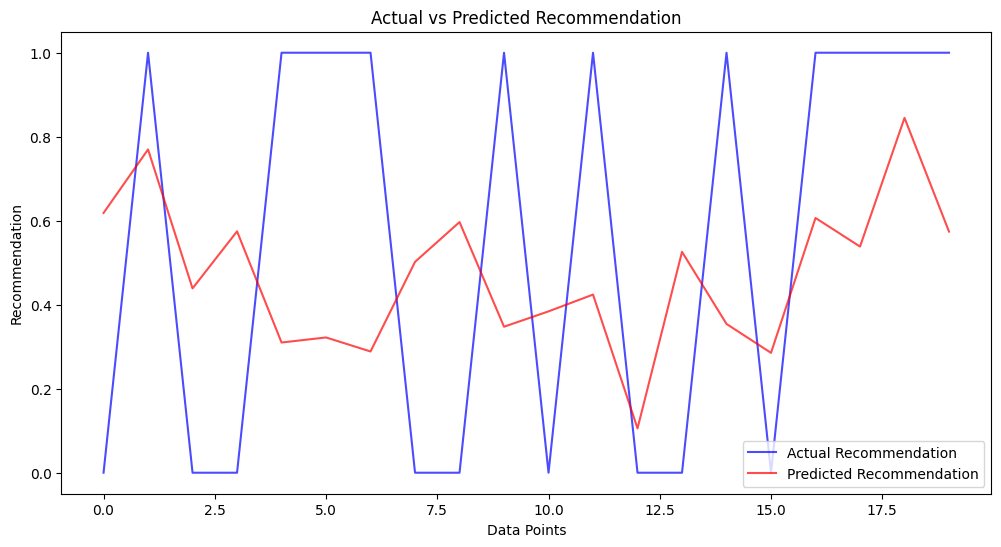

In [10]:
# Step 7: Visualization
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual Recommendation', color='b', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Recommendation', color='r', alpha=0.7)
plt.title('Actual vs Predicted Recommendation')
plt.xlabel('Data Points')
plt.ylabel('Recommendation')
plt.legend()
plt.show()